In [18]:
# Imports & Settings
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
DF = pd.read_csv("covid19_cleaned_8_10.zip", low_memory = False)

In [19]:
DF.columns

Index(['Unnamed: 0', 'ID', 'age', 'sex', 'city', 'province', 'country',
       'latitude', 'longitude', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'chronic_disease_binary', 'chronic_disease',
       'outcome', 'date_death_or_discharge', 'admin3', 'admin2', 'admin1',
       'travel_history_binary', 'hospitalized', 'deceased', 'fever', 'cough',
       'fatigue', 'headache', 'dizziness', 'sore throat', 'pneumonia',
       'respiratory', 'nausea', 'diarrhea', 'severe_r'],
      dtype='object')

In [16]:
# Neural net is refusing to run our machines--
# However, it does run when we use only half the data.
# Get the data training ready in this cell.

# Our working dataframe:
df_trimmed = DF

# Get rid of some extra columns.
df_trimmed = df_trimmed.drop(labels=["Unnamed: 0", "ID"], axis=1)

#boolify "sex"
df_trimmed["sex"] = [0 if s == "male" else 1 for s in df_trimmed["sex"]]

# Playing around with excluding our imputed age values.
# ugly...
# df_trimmed = df_trimmed[np.logical_not(np.logical_and(DF["age"]>=49.0, DF["age"]<=49.1))]

# Randomly select half of the data.
# (Thanks, Jorge.)
random50 = np.random.choice(np.arange(len(df_trimmed)), size=int(len(df_trimmed) / 2), replace=False)
df_trimmed = df_trimmed.iloc[random50,:]


# Now add in Gulnaz's dummies.
df_trimmed = pd.get_dummies(df_trimmed, columns=["country"])


In [20]:
df_trimmed.columns

Index(['age', 'sex', 'city', 'province', 'latitude', 'longitude',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms',
       ...
       'country_Ukraine', 'country_United Arab Emirates',
       'country_United Kingdom', 'country_United States', 'country_Uruguay',
       'country_Venezuela', 'country_Vietnam', 'country_Virgin Islands, U.S.',
       'country_Zambia', 'country_Zimbabwe'],
      dtype='object', length=166)

In [171]:
df_before_concat = df_trimmed[["age","chronic_disease_binary","hospitalized","deceased","travel_history_binary", "country"]]

In [172]:
# Predicting gender
dummies = pd.get_dummies(df_before_concat, columns=["country"]) # turn country column into dummies 
X = pd.concat([df_before_concat, dummies] ,axis=1)
X = X.drop(labels="country", axis=1)
Y = np.array(df_trimmed["sex"])

In [182]:
# Single train test split
model=ANN(hidden_layer_sizes=(16,8,4), max_iter=1000)

In [183]:
xtrain,xtest,ytrain,ytest=train_test_split(X, Y) # I am using x standardized 
model.fit(xtrain,ytrain)
YP=model.predict(xtest)
sex_singleAccuracy = accuracy_score(ytest,YP)

In [181]:
sex_singleAccuracy

0.5575309782190411

In [184]:
# Predicting deceased
df_before_concat = df_trimmed[["age","chronic_disease_binary","hospitalized","sex","travel_history_binary", "country"]]
dummies = pd.get_dummies(df_before_concat, columns=["country"]) # turn country column into dummies 
X = pd.concat([df_before_concat, dummies] ,axis=1)
X = X.drop(labels="country", axis=1)
Y = np.array(df_trimmed["deceased"])
xtrain,xtest,ytrain,ytest=train_test_split(X, Y) # I am using x standardized 
model.fit(xtrain,ytrain)
YP=model.predict(xtest)
death_singleAccuracy = accuracy_score(ytest,YP)

In [185]:
death_singleAccuracy

0.9978963031375869

In [203]:
# Predicting hospitalizations
df_before_concat = df_trimmed[["age","chronic_disease_binary","deceased","sex","travel_history_binary", "country"]]
dummies = pd.get_dummies(df_before_concat, columns=["country"]) # turn country column into dummies 
X = pd.concat([df_before_concat, dummies] ,axis=1)
X = X.drop(labels="country", axis=1)
Y = np.array(df_trimmed["hospitalized"])
xtrain,xtest,ytrain,ytest=train_test_split(X, Y) # I am using x standardized 
model.fit(xtrain,ytrain)
YP=model.predict(xtest)
hospital_singleAccuracy = accuracy_score(ytest,YP)

In [204]:
hospital_singleAccuracy

0.9988711870494369

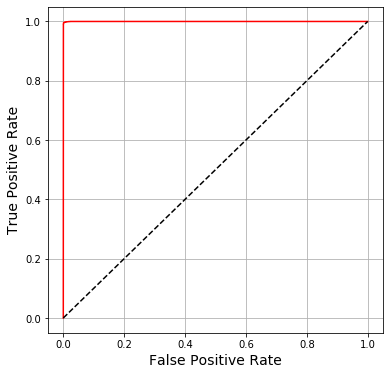

In [206]:
probabilities = model.predict_proba(xtest)    
FPR, TPR, THRESHOLD = roc_curve(ytest, probabilities[:,1])
plt.plot(FPR,TPR,c="red")
plt.plot([0,1],[0,1],c="k",ls="--")
plt.grid()
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.gcf().set_size_inches(6,6) 

In [215]:
X

,age,chronic_disease_binary,deceased,sex,travel_history_binary,age,chronic_disease_binary,deceased,sex,travel_history_binary,...,country_Thailand,country_Togo,country_Tunisia,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam,country_Zimbabwe
897580,34.5,0,0,0,0,34.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
897544,54.5,0,0,0,0,54.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513288,54.5,0,0,1,0,54.5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
506284,64.5,0,0,0,0,64.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188167,69.5,0,0,1,0,69.5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591380,47.0,0,0,1,0,47.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1484659,47.0,0,0,1,0,47.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
569675,64.0,0,0,1,0,64.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
964870,69.5,0,0,0,0,69.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [212]:
from sklearn.model_selection import cross_validate
# 5 Fold Cross Validation
hospitalization_scores = cross_validate(model, X, Y, cv=5, scoring="accuracy")

In [214]:
hospitalization_scores

{'fit_time': array([32.34410501, 18.56089854, 26.61841249, 22.61923528, 42.91427279]),
 'score_time': array([0.05399871, 0.05899811, 0.04999876, 0.06199813, 0.06199837]),
 'test_score': array([0.99903797, 0.99903794, 0.99913414, 0.99890966, 0.99916621])}

In [218]:
df_before_concat = df_trimmed[["age","chronic_disease_binary","deceased","sex","hospitalized", "country"]]
dummies = pd.get_dummies(df_before_concat, columns=["country"]) # turn country column into dummies 
X = pd.concat([df_before_concat, dummies] ,axis=1)
X = X.drop(labels="country", axis=1)
Y = np.array(df_trimmed["travel_history_binary"])
hospital_singleAccuracy = accuracy_score(ytest,YP)
travel_scores = cross_validate(model, X, Y, cv=5, scoring="accuracy")

In [219]:
travel_scores

{'fit_time': array([40.3096776 , 37.9553771 , 71.76605773, 29.28048897, 27.4191246 ]),
 'score_time': array([0.06799769, 0.05599856, 0.05699825, 0.05899787, 0.05099797]),
 'test_score': array([0.96511031, 0.96443575, 0.96629574, 0.96603919, 0.96539781])}